# METIS Intro to Data Science Project

## By: Ben McGauhey

### Seattle, WA Fall-2017

# Exploratory Data Analysis
We will start by simply loading our dataframe from the pickle file we saved it as earlier, then we will explore some of the relationships between variables and create some visualizations to better understand the data.

In [35]:
import pandas as pd
import numpy as np          # As Always we import our libraries
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
%matplotlib inline

In [36]:
df = pd.read_pickle('Data/weatherAndCallData.pkl') # Get our dataframe up and running from our saved file

# Getting and cleaning my data took much longer than anticipated, and the large size of the dataset had me waiting for way too long for most calculations to run, so in the interest of time, we will be selecting Homicide as our outcome and only be focusing on the effects of location and weather on homicides

## Our initial instincts tell us that location probably has a greater effect than the weather on our outcome variable, so lets take a look at where our events have occured

In [3]:
homicideDF = df[df.homicide == 1]
homicideDF = homicideDF.iloc[:,0:3]
locations = homicideDF[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

93

In [4]:
map = folium.Map(location=[47.713253, -122.355515], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

In [5]:
dropCols = df.columns[4:39] # Make a mask of our other crime columns

In [6]:
df.drop(dropCols, axis=1, inplace=True) # Drop the other crimes from our df

In [7]:
homicide = df.homicide # Rearrange our df so our outcome is in the first column
df.drop('homicide', axis=1, inplace=True)
df.insert(0,'homicide', homicide)

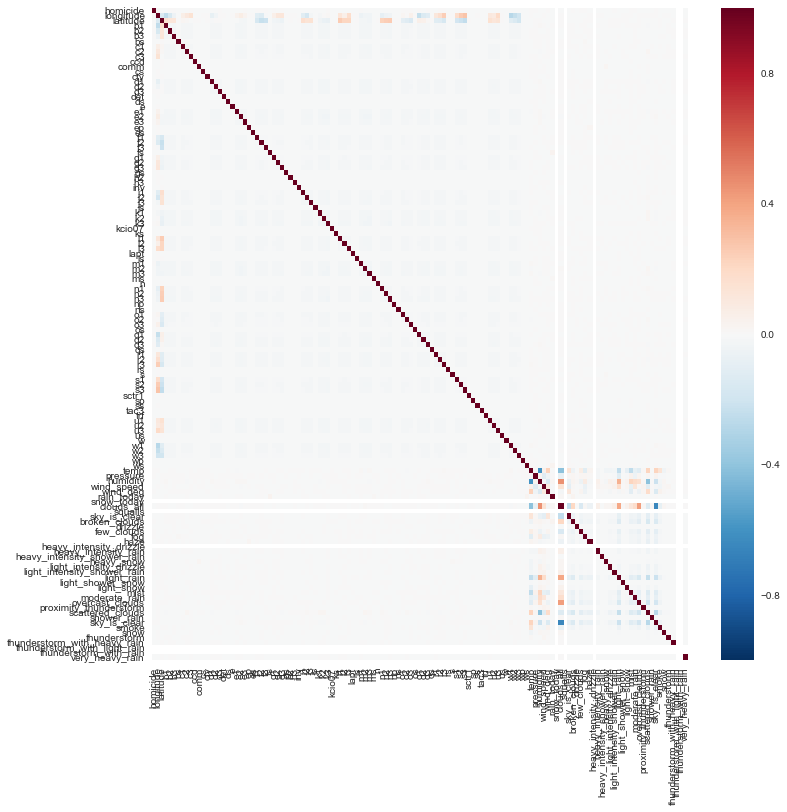

In [21]:
corr = df.corr()
sns.set_style('whitegrid') # Set our style
fig, ax = plt.subplots()
fig.set_size_inches(12, 12) # Make it big enough to read the column names
sns.heatmap(corr) # Plot a heatmap 

In [24]:
homicideCorrs = corr.iloc[:,0]
homicideCorrs.sort_values(ascending=False)

homicide                        1.000000
s2                              0.005610
g1                              0.003607
longitude                       0.003552
k3                              0.003466
mist                            0.002854
r3                              0.002794
c3                              0.002458
s3                              0.002364
g3                              0.002209
e3                              0.001796
f3                              0.001565
sky_is_clear                    0.001469
o3                              0.001069
few_clouds                      0.001047
temp                            0.001021
pressure                        0.001005
light_intensity_shower_rain     0.000954
wind_deg                        0.000854
d3                              0.000771
q1                              0.000734
q3                              0.000606
f1                              0.000581
o2                              0.000572
f2              

In [44]:

pd.set_option('display.max_columns', 200) # Set our options so we can see some more of the data by scrolling
pd.set_option('display.max_row', 50)
print(df.columns.values)





['longitude' 'latitude' 'formatted_time' 'homicide' 'robbery' 'assault'
 'burglary' 'theft' 'car_theft' 'reckless_burning' 'fraud' 'vice'
 'property' 'lewd_behavior' 'trespass' 'park_violation' 'liquor_violation'
 'drive_by_shooting' 'narcotics' 'warrant_service' 'security_alarms'
 'mental_health' 'disturbance' 'animals' 'suspicious_case'
 'person_with_weapon' 'harbor_theft' 'casualty' 'harbor_boat_assist'
 'harbor_dui' 'hazards' 'missing_person' 'missing_property' 'crowd_control'
 'traffic_general' 'dui' 'traffic_minor' 'human_trafficking' '99' 'b1' 'b2'
 'b3' 'bs' 'c1' 'c2' 'c3' 'ccd' 'comm' 'cs' 'cty' 'd1' 'd2' 'd3' 'det' 'ds'
 'e' 'e1' 'e2' 'e3' 'ep' 'es' 'f1' 'f2' 'f3' 'fs' 'g1' 'g2' 'g3' 'gs' 'h2'
 'h3' 'inv' 'j1' 'j2' 'j3' 'js' 'k1' 'k2' 'k3' 'kcio07' 'ks' 'l1' 'l2' 'l3'
 'lapt' 'ls' 'm1' 'm2' 'm3' 'ms' 'n' 'n1' 'n2' 'n3' 'np' 'ns' 'o1' 'o2'
 'o3' 'os' 'q1' 'q2' 'q3' 'qs' 'r1' 'r2' 'r3' 'rs' 's' 's1' 's2' 's3'
 'sctr1' 'sp' 'ss' 'tac3' 'trf' 'u1' 'u2' 'u3' 'us' 'w' 'w1' 'w2' 'w3

In [69]:
crimeInfo = df.iloc[:,3:38] # Create some subsets of our dataframe to make specific comparisons with
beatInfo = df.iloc[:,38:-31]
wxInfo = df.iloc[:,-31:]

In [71]:
print(crimeInfo.expanding(min_periods=1).corr(other=wxInfo, pairwise=True))

KeyboardInterrupt: 